In [121]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

## Data Collection

In [102]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Term-deposit_Subsription_Prediction/main/bank-full.csv'

data = pd.read_csv(path, sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Preparation

### Data Cleaning

In [71]:
data.shape

(45211, 17)

The dataset comprises 45,211 rows and 17 columns. Among these, 16 columns serve as independent variables, while 1 column (the target variable) functions as the dependent variable.

In [72]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Many variables in our dataset currently have the data type 'object', so we will be changing it to appropriate datatype.

In [73]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'{column} - {data[column].unique()}\n')

job - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital - ['married' 'single' 'divorced']

education - ['tertiary' 'secondary' 'unknown' 'primary']

default - ['no' 'yes']

housing - ['yes' 'no']

loan - ['no' 'yes']

contact - ['unknown' 'cellular' 'telephone']

month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome - ['unknown' 'failure' 'other' 'success']

y - ['no' 'yes']



We observe that four variables (default, housing, loan, y) exhibit binary outputs (yes, no). To facilitate model building, we can convert them into categorical variables using label encoding.

In [103]:
label_encoder = LabelEncoder()
column_names = ['default','housing','loan','y']

for column in column_names:
    data[column] = label_encoder.fit_transform(data[column])
    
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(4), int64(7), object(6)
memory usage: 5.2+ MB


The 4 categorical variables have been converted to numerical and there are no missing values present in the dataset.

In [76]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### Data Analysis and Visualization

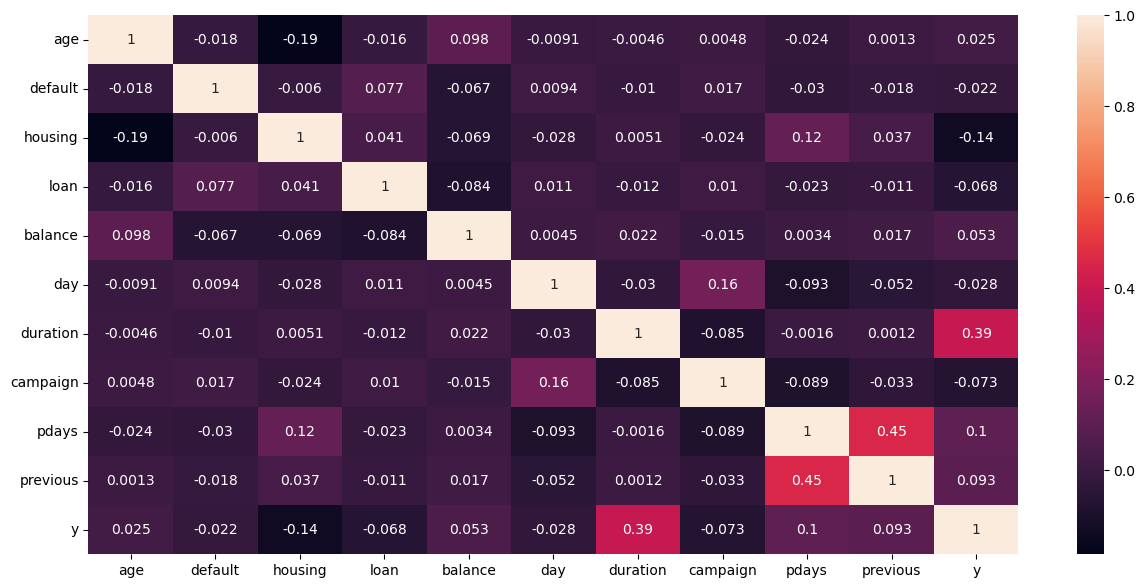

In [78]:
plt.figure(figsize = (15,7))
corr = data[['age','default','housing','loan','balance','day','duration', 'campaign', 'pdays','previous','y']].corr()
sns.heatmap(data = corr, annot = True)
plt.show()

We observe moderate correlation between 'previous' and 'pdays,' as well as between 'duration' and 'y,' while all the other variables exhibit weak or no correlation.

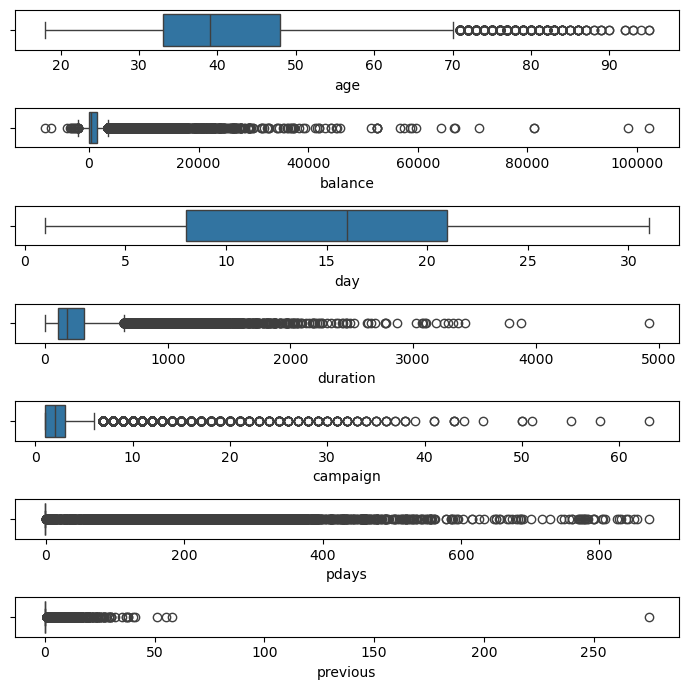

In [79]:
num_data = ['age','balance','day','duration', 'campaign', 'pdays','previous']
fig, axs = plt.subplots(len(num_data),1, figsize = (7,7))
i = 0

for col in num_data:
    sns.boxplot(data = data, x = col, ax = axs[i])
    i += 1

fig.tight_layout()

There are a lot of outliers present in the dataframe, but we cannot drop them because they exist in a substantial quantity and may be important for model building.

In [80]:
data.groupby('y')['y'].count()

y
0    39922
1     5289
Name: y, dtype: int64

Based on the information above, a substantial disparity exists in the data, with a significant difference between clients not subscribing ('no': 39,922) and subscribing ('yes': 5,289) to a term deposit. This suggests that our model is likely to excel in predicting clients who will not subscribe to a term deposit.

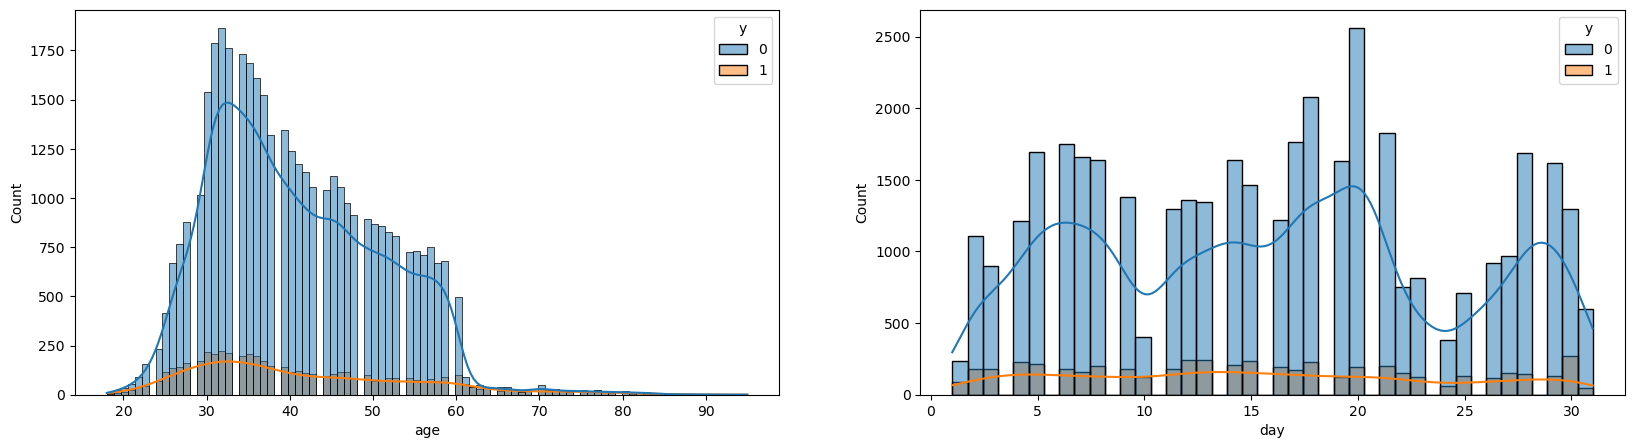

In [81]:
fig, axs = plt.subplots(1,2, figsize = (20,5))

sns.histplot(data = data, x = 'age', hue = 'y', kde = True, ax = axs[0])
sns.histplot(data = data, x = 'day', hue = 'y', kde = True, ax = axs[1])

plt.show()

The bank's called clients span a wide age range (18 to 95 years), but the majority falls within the 30s to 40s. The age distribution is relatively normal with a small standard deviation, and the subscription rate is higher among clients aged 30 to 40.

While the number of contacts made remains consistent across most days, there is a higher concentration of data points on the 20th day.

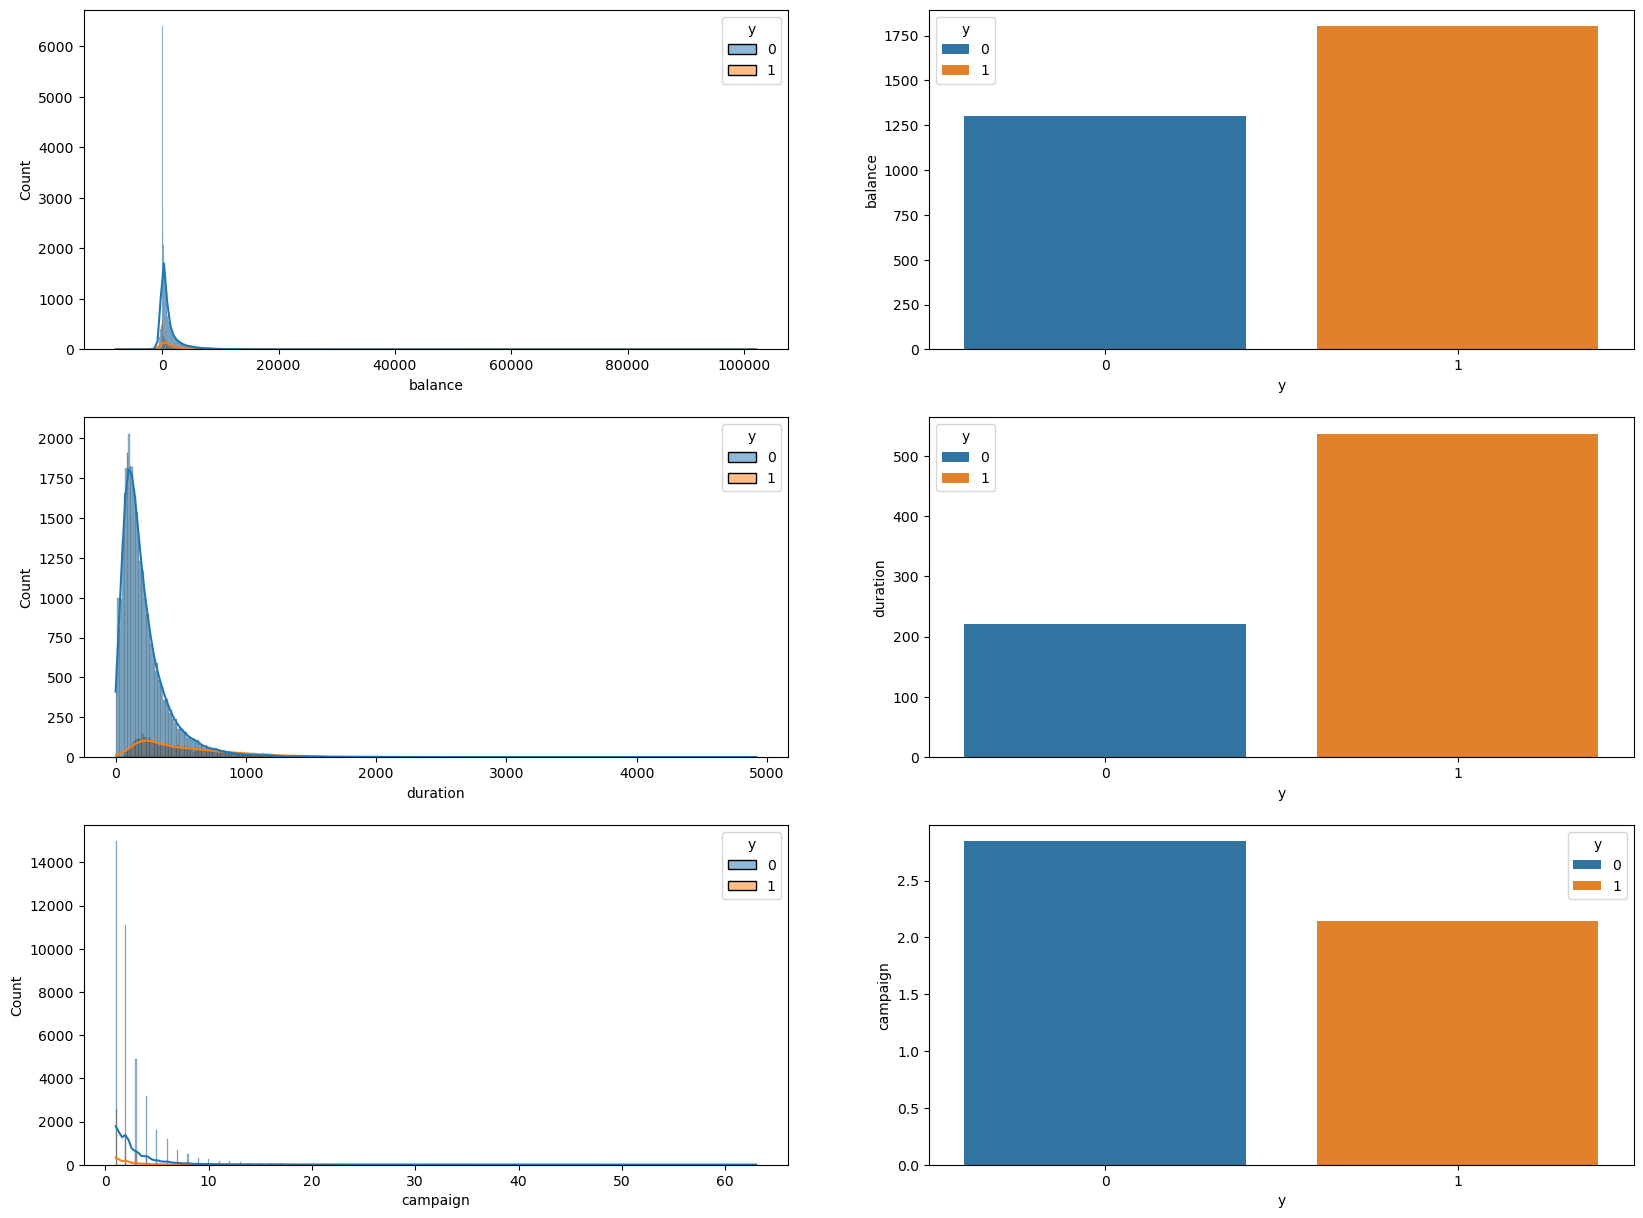

In [82]:
fig, axs = plt.subplots(3,2, figsize = (20,15))

sns.histplot(data = data, x = 'balance', hue = 'y', kde = True, ax = axs[0,0])
sns.barplot(data = data, x = 'y', y = 'balance', hue = 'y', errorbar = None, ax = axs[0,1])
sns.histplot(data = data, x = 'duration', hue = 'y', kde = True, ax = axs[1,0])
sns.barplot(data = data, x = 'y', y = 'duration', hue = 'y', errorbar = None, ax = axs[1,1])
sns.histplot(data = data, x = 'campaign', hue = 'y', kde = True, ax = axs[2,0])
sns.barplot(data = data, x = 'y', y = 'campaign', hue = 'y', errorbar = None, ax = axs[2,1])

plt.show()

The 'balance' column exhibits a rightward tail, indicating the presence of outliers. Clients with a yearly balance between 1 to 1750 euros are the majority of subscribers.

The right-skewed duration distribution suggests that most calls are short, with a notable presence of outliers. Additionally, if the call duration falls between 5 to 10 minutes, clients are more likely to subscribe to the term deposit.

The bank primarily contacts clients one to three times, with a few exceptions reaching as high as 40-50 times, possibly due to special needs. Subscribers are typically contacted 1-2 times, while those contacted more than 2 times often do not subscribe to a term deposit.

<Axes: xlabel='job', ylabel='count'>

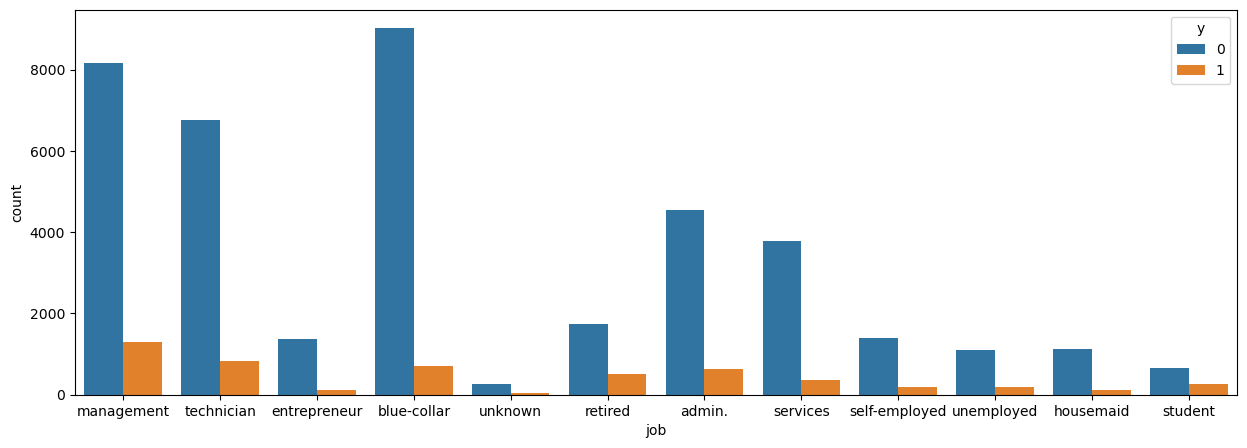

In [83]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'job', hue = 'y')

The chart above illustrates that the dataset predominantly consists of clients with 'blue-collar' jobs. Additionally, there is a substantial count of clients in management and technician roles, far surpassing other job categories. The number of students is comparatively low. Notably, the subscription rate (ratio) is higher for students and retired clients.

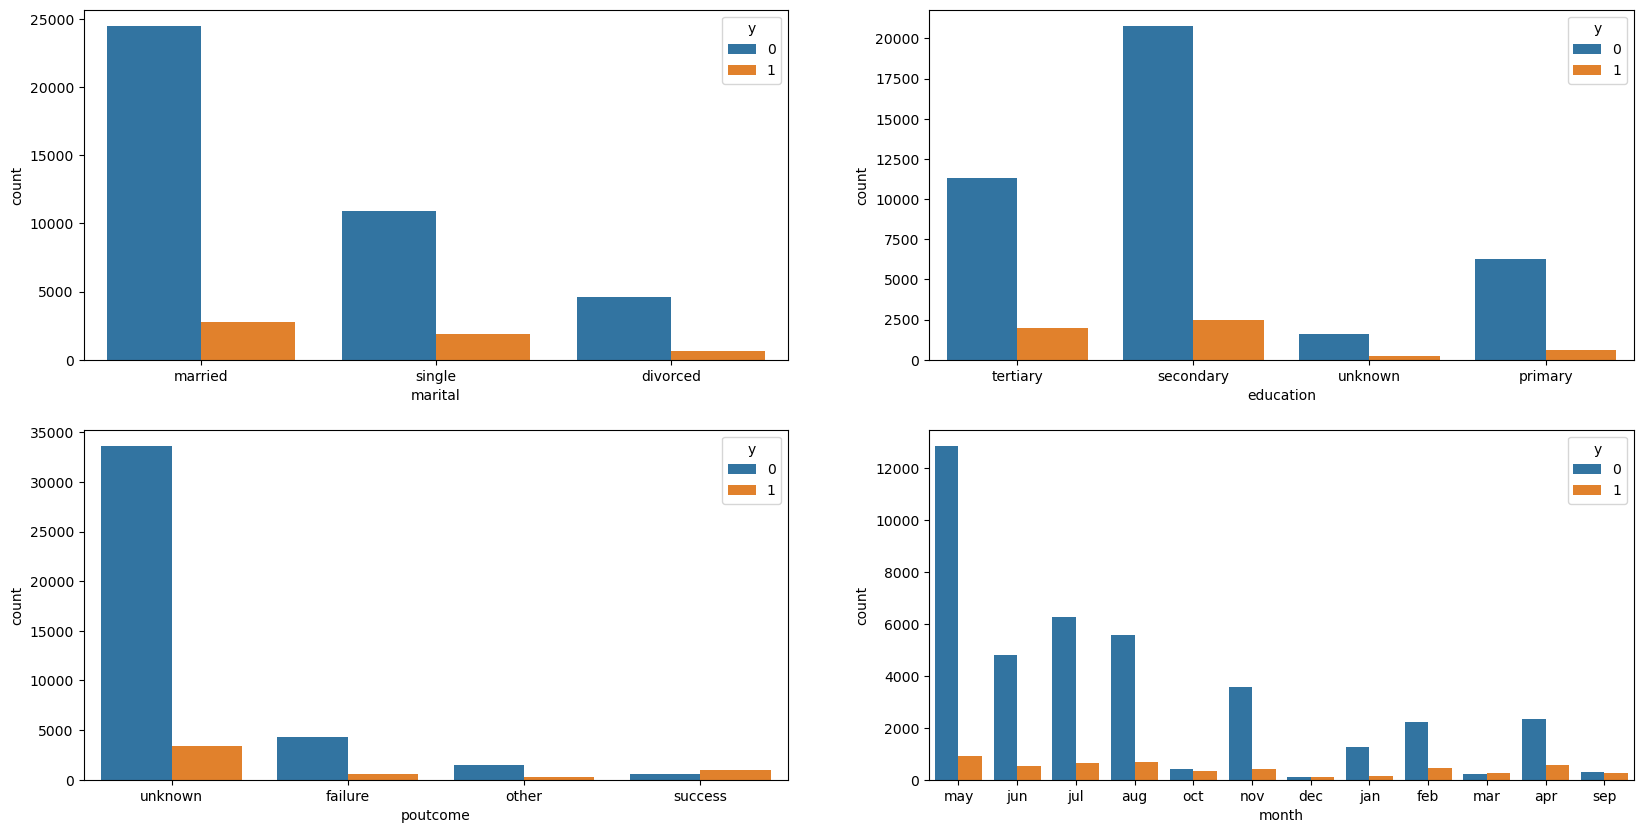

In [84]:
fig, axs = plt.subplots(2,2,figsize = (20,10))

sns.countplot(data = data, x = 'marital', hue = 'y', ax = axs[0,0])
sns.countplot(data = data, x = 'education', hue = 'y', ax = axs[0,1])
sns.countplot(data = data, x = 'poutcome', hue = 'y', ax = axs[1,0])
sns.countplot(data = data, x = 'month', hue = 'y', ax = axs[1,1])

plt.show()

The dataset contains a significant number of married clients. Notably, the subscription ratio towards term deposits is favorable among clients who are single.

The number of clients with a 'secondary' level of education is significantly higher compared to other education levels. Moreover, clients with education levels 'secondary' and 'tertiary' are more inclined to subscribe to the term deposit.

It is evident that the results of the previous marketing campaign are predominantly unknown or nonexistent. The failure rate surpasses the success rate.

The majority of client contacts by the bank took place between May and July. May experienced the highest contact rate, while March, September, October, and December had notably lower contact rates. The peak subscription rate was observed in March, exceeding 50%, and subscription rates in September, October, and December ranged from 30% to 40%.

<Axes: xlabel='loan', ylabel='count'>

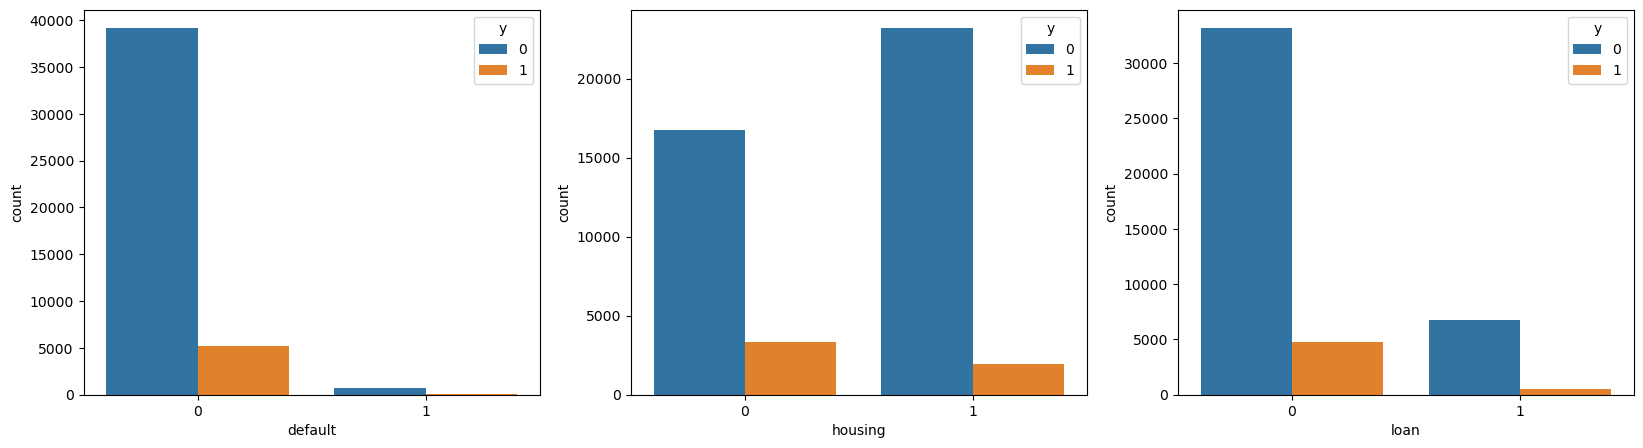

In [85]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))

sns.countplot(data = data, x = 'default', hue = 'y', ax = axs[0])
sns.countplot(data = data, x = 'housing', hue = 'y', ax = axs[1])
sns.countplot(data = data, x = 'loan', hue = 'y', ax = axs[2])

The majority of clients do not have default credit, and the subscribers predominantly belong to the group without credit in default. 

Additionally, a considerable number of clients have housing loans, with those without housing loans being more inclined to subscribe to the term deposit. 

In terms of personal loans, most clients do not have one, and the subscription ratios for clients with and without personal loans are nearly identical.

<Axes: xlabel='contact', ylabel='count'>

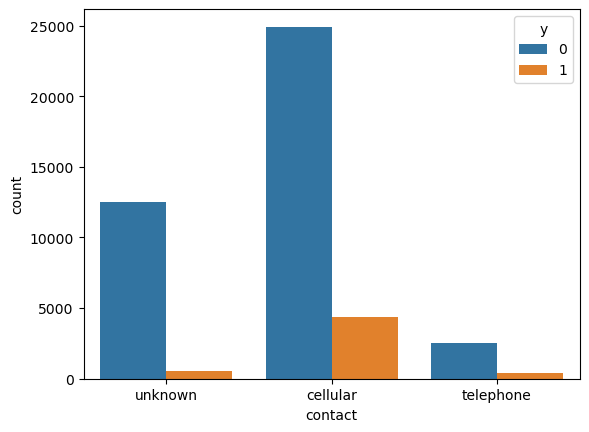

In [86]:
sns.countplot(data = data, x = 'contact', hue = 'y')

It's observed that the majority of clients have been contacted via a cellular phone. Based on my understanding, the communication type of contact is not expected to play a significant role in model building, as there is likely no meaningful relationship between the contact type and the term deposit subscription. Therefore, we will exclude 'Contact' from the model building process.

In [104]:
data.drop(columns = 'contact', inplace = True)
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,5,may,198,1,-1,0,unknown,0


### Feature Engineering

In [108]:
data = pd.get_dummies(data, columns = ['job','marital','education','month','poutcome'], dtype = 'int')

In [109]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


Using one-hot encoding, we transformed the remaining five categorical variables into numerical format, resulting in an increase in the number of columns from 16 to 46.

## Model Selection - Logistic Regression

### Model building and Training

In [117]:
x = data.drop('y', axis = 1)
y = data['y']

scaler = StandardScaler()
X = scaler.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 7)

print(f'X_train data {X_train.shape}')
print(f'y_train data {y_train.shape}')
print(f'X_test data {X_test.shape}')
print(f'y_test data {y_test.shape}')

X_train data (36168, 45)
y_train data (36168,)
X_test data (9043, 45)
y_test data (9043,)


In [118]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

## Model Evaluation

The Accuracy score :- 0.91

The Precision score :- 0.66

Classification Report :-
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8027
           1       0.66      0.36      0.47      1016

    accuracy                           0.91      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.91      0.90      9043


Confusion Matrix :-
 [[7837  190]
 [ 646  370]]


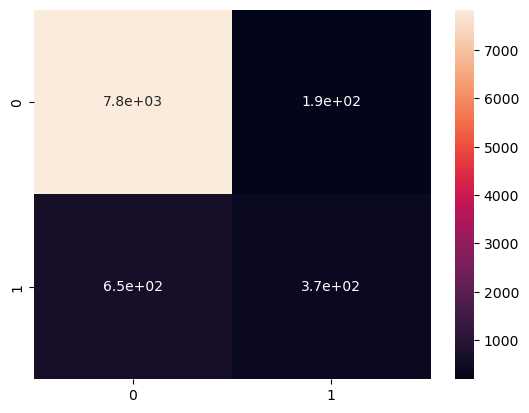

In [127]:
y_pred = lg_model.predict(X_test)

print('The Accuracy score :-',round(accuracy_score(y_test,y_pred),2))
print('\nThe Precision score :-',round(precision_score(y_test,y_pred),2))
print('\nClassification Report :-\n',classification_report(y_test,y_pred))
print('\nConfusion Matrix :-\n',confusion_matrix(y_test,y_pred))

sns.heatmap(data = confusion_matrix(y_test,y_pred), annot = True)
plt.show()

The model demonstrates strong performance in correctly classifying the majority class (class 0) with high precision, recall, and F1-score. However, there is room for improvement in the classification of the minority class (class 1), as indicated by lower precision, recall, and F1-score.